# DICOM introduction

### Working with DICOM is easy in Python

1. Import the tool that we will use to work with DICOM.

In [2]:
import pydicom

### Now we are good.

Lets load the DICOM file 'C:\Users\oli_n\Desktop\SynoWork\Presentations\R4 Python\DICOM\US.dcm'

In [3]:
ds = pydicom.dcmread('US.dcm')
# ds = pydicom.dcmread(r'D:\1.3.6.1.4.1.25403.154027277515425.16036.20210617022156.1\1.3.6.1.4.1.25403.154027277515425.16036.20210617022156.3.dcm')


### Easy. Let's explore.

Firstly, let's take the pixel data and make an image object using the Pillow (PIL) library.

In [4]:
from PIL import Image
dicom_img = Image.fromarray(ds.pixel_array)

#### Let's display the image.

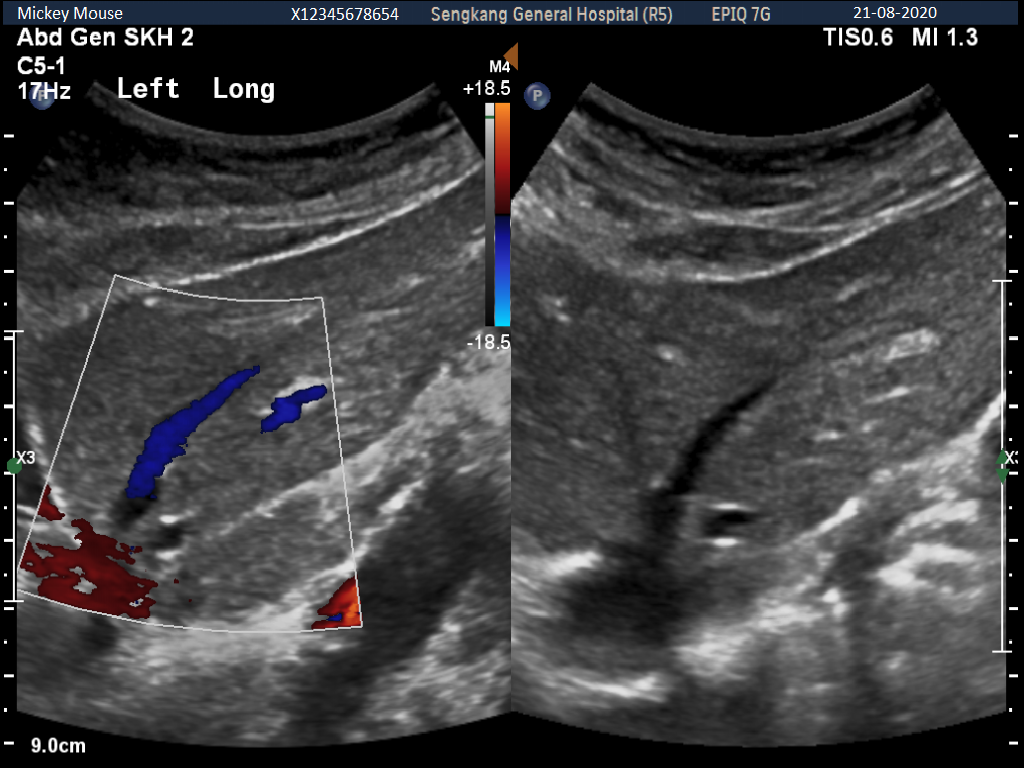

In [17]:
dicom_img

#### Now let's have a look at the metadata

In [11]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Ultrasound Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.25403.154027277515425.27828.20210426113928.3
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.25403.1.1.1
(0002, 0013) Implementation Version Name         SH: 'Dicom 0.1'
(0002, 0016) Source Application Entity Title     AE: ''
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'ABDOMINAL']
(0008, 0012) Instance Creation Date              DA: '20200821'
(0008, 0013) Instance Creation Time              TM: '112757'
(0008, 0016) SOP Class UID                       UI: Ultrasound Image Storage
(0008, 0018) SOP 

#### One more thing- let's not forget the 'preamble' which also needs inspecting.

In [7]:
ds.preamble

b'This is the preamble. This content is inserted by vendors and is often not controlled\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

## Let's Anonymise the DICOM.

Anonymise by individual tags.

In [8]:
ds.PatientName = 'Anonymouse'
ds.PatientID = 'MouseZero'

ds.StudyID = 'SEUS123456'
ds.InstitutionName = 'St Elsewhere'
ds.ReferringPhysicianName = 'Dr Dave'
ds.StationName = 'US Room'

### Explore by Value Representation (VR)

Different DICOM tags have different content types and therefore different rules of what content is allowed.

The complete list of these and exact descriptions of content can be found here:

http://dicom.nema.org/dicom/2013/output/chtml/part05/sect_6.2.html

In [10]:

def person_name_callback(dataset, data_element):
    if data_element.VR == 'PN':
        print(f'Person Name Tag: {data_element.description()}: "{data_element.value}"')
        data_element.value = 'Anonymous person'

ds.walk(person_name_callback)


Person Name Tag: Referring Physician's Name: "Dr Dave"
Person Name Tag: Physician(s) of Record: "Donald Duck MD"
Person Name Tag: Operators' Name: "Scrooge McDuck"
Person Name Tag: Patient's Name: "Anonymouse"
Person Name Tag: Requesting Physician: "Donald Duck MD"


This is quite a powerful technique.

It can be altered to replace all names (VR == 'PN') or all dates (VR == 'DA') etc.

### Private Tags

These are NOT specified in the DICOM stadard and are inserted by Manufacturers for their own purposes.

- Standard tags have an EVEN numbered group.

- Private tags have an ODD numbered group.


In [12]:
foot_ds = pydicom.read_file('foot.dcm')

In [15]:
foot_ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 166
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113704.7.1.0.15221016620814474.1620628732.47
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113704.7.0.2
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'RAD']
(0008, 0012) Instance Creation Date              DA: '20210510'
(0008, 0013) Instance Creation Time              TM: '143852'
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID            

#### Note the private tags e.g.:

- (0017, 0010) Private Creator                     LO: 'ACME GruntMaster 9000'

and:

- (07a3, 1018) Private tag data                    ST: 'Mr John Smith has an ouchy foot. Trodden on by badger.'

#### Also note the PHI in an unexpected location:

- (0010, 2110) Allergies                           LO: 'NKDA. But John Smith (X123456789) has faecal incontinence with milk.'

#### Let's remove all those pesky private tags:

In [14]:

def remove_private_tags(dataset, data_element):
    if data_element.tag.group % 2 != 0:
        del dataset[data_element.tag]

foot_ds.walk(remove_private_tags)


#### Or alternatively, you can just do this.  Because it's easier.

In [ ]:
foot_ds.remove_private_tags()

# Done!

## Save the anonymised DICOM


In [16]:
ds.save_as('anonymised.dcm')


### But there's more!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.



# Go the extra mile... The image still shows burned-in data - Pt name, IC etc.

### Let's use Tesseract to do OCR and feed us the text details.  We will use a wrapper function called 'pyTesseract' to allow us to interact with Tesseract.

for those who want to try this for themselves you will need to install both Tesseract _and_ pyTesseract

Tesseract: https://github.com/tesseract-ocr/tesseract#installing-tesseract

PyTesseract: https://pypi.org/project/pytesseract/

In [18]:
from PIL import Image, ImageDraw
import pytesseract

# If you don't have the tesseract executable in your PATH, include the following:
# This works in my windows installation but will need to be changed to match your setup.
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\oli_n\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [19]:
txt_data = pytesseract.image_to_data(dicom_img, output_type='dict')

# We run this twice as this one produces nicely formatted output.
print(pytesseract.image_to_data(dicom_img))


level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1024	768	-1	
2	1	1	0	0	0	17	6	961	108	-1	
3	1	1	1	0	0	17	6	961	68	-1	
4	1	1	1	1	0	18	6	918	18	-1	
5	1	1	1	1	1	18	6	51	16	96.668755	Mickey
5	1	1	1	1	2	74	7	48	12	96.704895	Mouse
5	1	1	1	1	3	291	8	108	12	79.705978	X12345678654
5	1	1	1	1	4	432	7	75	17	0.000000	Sengkang
5	1	1	1	1	5	514	7	58	14	92.747971	General
5	1	1	1	1	6	577	7	96	17	37.104240	Hospital(R5)
5	1	1	1	1	7	712	7	35	17	37.104240	 EPIQ
5	1	1	1	1	8	752	7	19	14	37.630455	7G
5	1	1	1	1	9	853	7	83	11	92.191483	21-08-2020
4	1	1	1	2	0	17	27	961	19	-1	
5	1	1	1	2	1	17	27	45	19	96.863045	Abd
5	1	1	1	2	2	71	27	44	19	93.283333	Gen
5	1	1	1	2	3	124	27	48	19	91.311623	SKH
5	1	1	1	2	4	182	27	11	19	97.021545	2
5	1	1	1	2	5	823	27	70	19	86.624252	TISO.6
5	1	1	1	2	6	913	27	24	19	50.301247	MI
5	1	1	1	2	7	948	27	30	19	50.301247	1.3
4	1	1	1	3	0	18	56	45	18	-1	
5	1	1	1	3	1	18	56	45	18	83.219055	C5-1
3	1	1	2	0	0	19	74	255	40	-1	
4	1	1	2	1	0	19	74	255	40	-1

### Now we know what the text is and where it is, we can look through the list and blank it all out.

We will use the Pillow (PIL) library to draw a rectangle of colour #800080 (which is somewhat purple) over each of the text fields.

### There are many ways to do this, but for ease of use I have made a single function that will mark the text on a given image, based on the text data from Tesseract.


- create the ImageDraw object to allow it to edit the image

- Run through the list of text found

- Filter out the empty fields - tesseract is good but not perfect right out of the box

- Highlight text with a rectangle

If anyone is interested, it can be trained on new data to better recognise the fonts from US machines!


In [20]:
# Single function to mark the text -just provide the PIL image and the Tesseract text data
def mark_text(img, txt_data):
    img1 = ImageDraw.Draw(img)
    
    for i in range(len(txt_data['level'])):

        if txt_data['text'][i].strip() == '':
            continue
        #if float(txt_data['conf'][i]) < 50:
        #    continue

        left = txt_data['left'][i]
        right = left + txt_data['width'][i]
        top = txt_data['top'][i]
        bottom = top + txt_data['height'][i]
        txt = txt_data['text'][i]

        print(f'{i}: ({left},{top})-({bottom},{right})\t"{txt}"')

        shape = [(left, top), (right + 1, bottom + 1)]
        img1.rectangle(shape, outline = "#FF8822")
        img1.rectangle(shape, fill ="#800080")


4: (18,6)-(22,69)	"Mickey"
5: (74,7)-(19,122)	"Mouse"
6: (291,8)-(20,399)	"X12345678654"
7: (432,7)-(24,507)	"Sengkang"
8: (514,7)-(21,572)	"General"
9: (577,7)-(24,673)	"Hospital(R5)"
10: (712,7)-(24,747)	" EPIQ"
11: (752,7)-(21,771)	"7G"
12: (853,7)-(18,936)	"21-08-2020"
14: (17,27)-(46,62)	"Abd"
15: (71,27)-(46,115)	"Gen"
16: (124,27)-(46,172)	"SKH"
17: (182,27)-(46,193)	"2"
18: (823,27)-(46,893)	"TISO.6"
19: (913,27)-(46,937)	"MI"
20: (948,27)-(46,978)	"1.3"
22: (18,56)-(74,63)	"C5-1"
25: (19,74)-(114,70)	"1tHz"
26: (118,77)-(108,179)	"Left"
27: (214,77)-(103,274)	"Long"


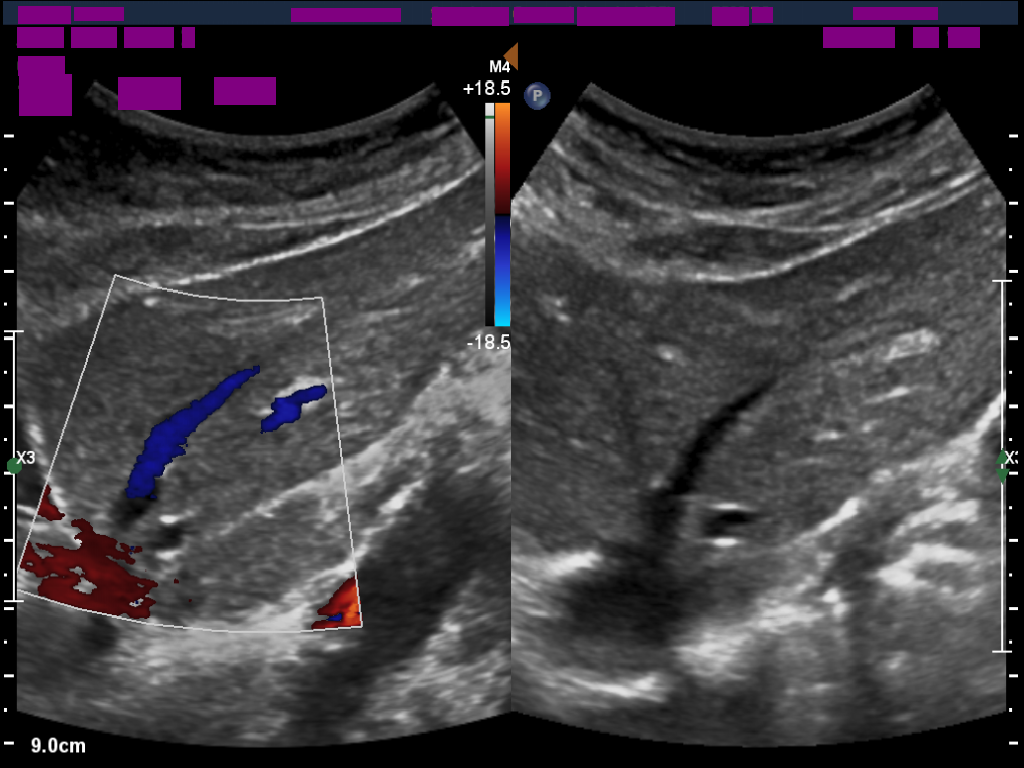

In [21]:
mark_text(dicom_img, txt_data)
dicom_img

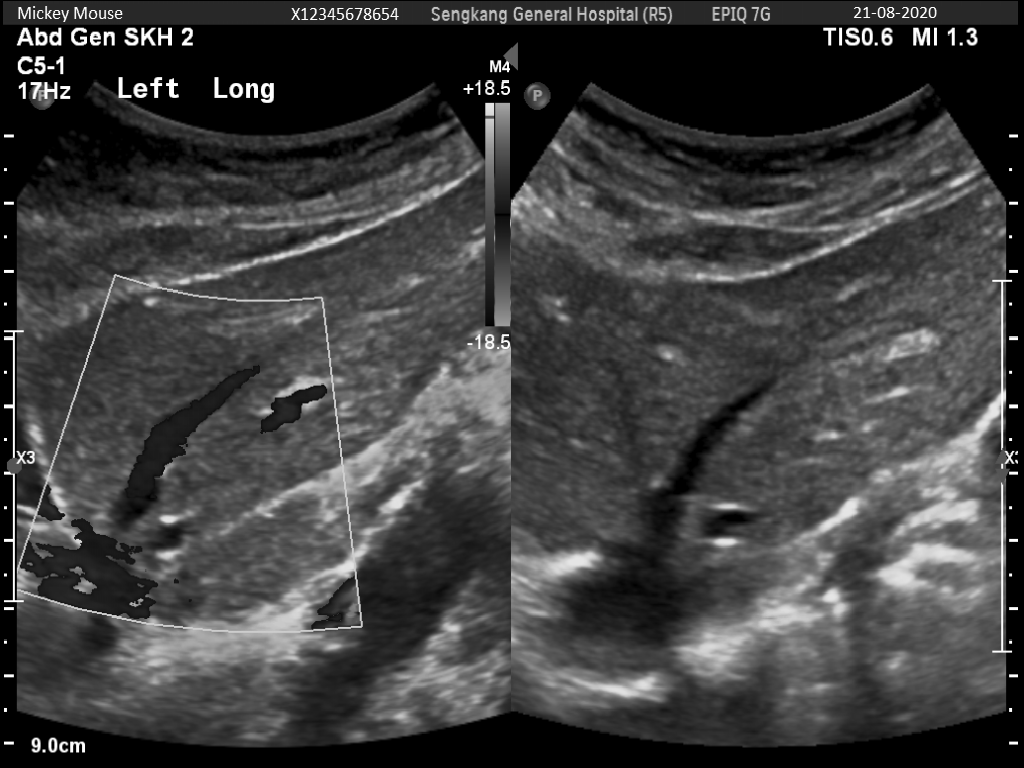

In [22]:
test_dicom = Image.fromarray(ds.pixel_array)
dicom_bw = test_dicom.convert('L')
dicom_bw

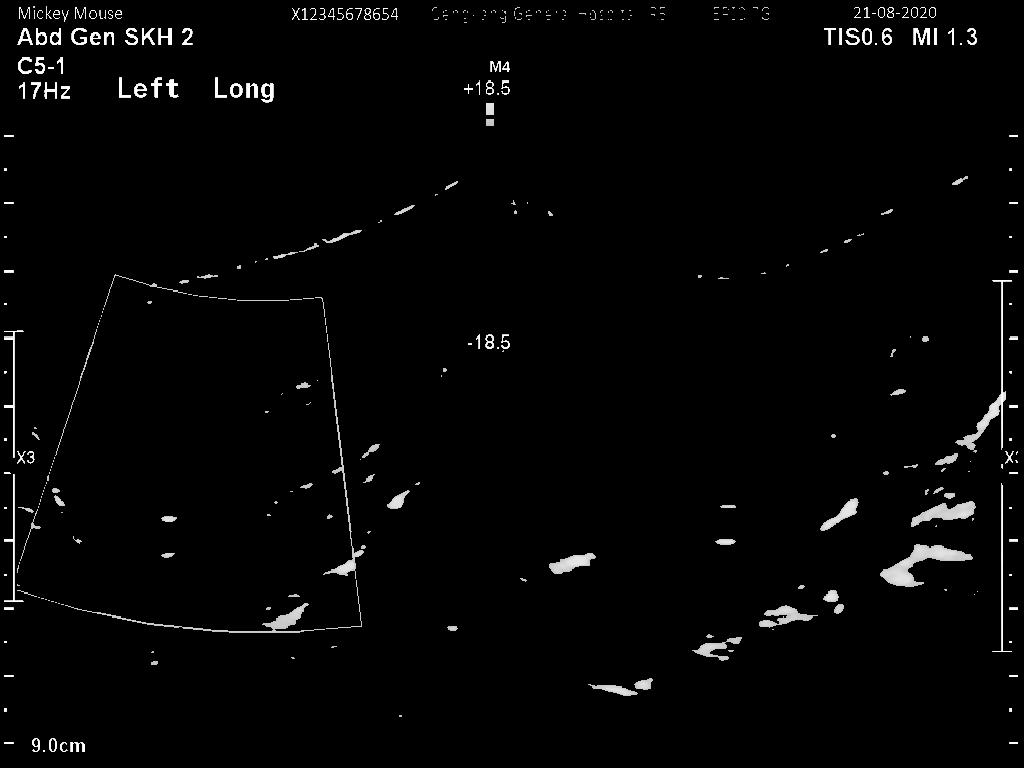

In [23]:
THRESHOLD = 0.75 * 255

def pixelThreshold(intensity):
    if intensity > THRESHOLD:
        return intensity
#         return 255
    else:
        return 0

highpass_img = dicom_bw.point(pixelThreshold)

highpass_img

In [24]:
print(pytesseract.image_to_data(highpass_img))

highpass_txt_data = pytesseract.image_to_data(highpass_img, output_type='dict')


level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1024	768	-1	
2	1	1	0	0	0	4	6	506	209	-1	
3	1	1	1	0	0	4	6	506	209	-1	
4	1	1	1	1	0	19	6	379	16	-1	
5	1	1	1	1	1	19	6	50	16	96.379288	Mickey
5	1	1	1	1	2	75	7	47	12	96.829269	Mouse
5	1	1	1	1	3	292	8	106	12	7.539177	12345678654
4	1	1	1	2	0	17	28	176	17	-1	
5	1	1	1	2	1	17	28	44	17	95.728783	Abd
5	1	1	1	2	2	71	28	43	17	93.140587	Gen
5	1	1	1	2	3	125	28	47	17	93.059753	SKH
5	1	1	1	2	4	182	28	11	17	97.016716	2
4	1	1	1	3	0	18	57	492	17	-1	
5	1	1	1	3	1	18	57	45	17	35.689819	C5-4
5	1	1	1	3	2	490	61	20	11	78.530220	Ma
4	1	1	1	4	0	19	77	491	38	-1	
5	1	1	1	4	1	19	82	51	17	88.353302	17Hz
5	1	1	1	4	2	119	77	60	21	94.630257	Left
5	1	1	1	4	3	215	77	59	26	94.630257	Long
5	1	1	1	4	4	464	80	46	35	59.294540	+188
4	1	1	1	5	0	435	181	23	15	-1	
5	1	1	1	5	1	435	181	23	15	40.002541	2
4	1	1	1	6	0	4	202	411	13	-1	
5	1	1	1	6	1	4	202	10	2	83.558601	7
5	1	1	1	6	2	394	205	21	10	35.877357	a
2	1	2	0	0	0	100	230	262	112	-1	
3	

In [25]:
dicom_bw2 = highpass_img.convert('RGB')

mark_text(img = dicom_bw2, txt_data = highpass_txt_data)

4: (19,6)-(22,69)	"Mickey"
5: (75,7)-(19,122)	"Mouse"
6: (292,8)-(20,398)	"12345678654"
8: (17,28)-(45,61)	"Abd"
9: (71,28)-(45,114)	"Gen"
10: (125,28)-(45,172)	"SKH"
11: (182,28)-(45,193)	"2"
13: (18,57)-(74,63)	"C5-4"
14: (490,61)-(72,510)	"Ma"
16: (19,82)-(99,70)	"17Hz"
17: (119,77)-(98,179)	"Left"
18: (215,77)-(103,274)	"Long"
19: (464,80)-(115,510)	"+188"
21: (435,181)-(196,458)	"2"
23: (4,202)-(204,14)	"7"
24: (394,205)-(215,415)	"a"
32: (468,334)-(352,510)	"185"
34: (4,371)-(374,7)	"."
35: (296,382)-(389,311)	"."
36: (443,368)-(372,447)	","
38: (4,427)-(441,40)	"ai"
40: (17,451)-(464,35)	"Ka"
41: (362,444)-(458,380)	"ae"
45: (4,742)-(744,14)	"—"
46: (32,738)-(752,85)	"9.0cm"
54: (854,7)-(18,936)	"21-08-2020"
58: (824,28)-(45,892)	"TISO.6"
59: (913,28)-(45,977)	"MI1.3"


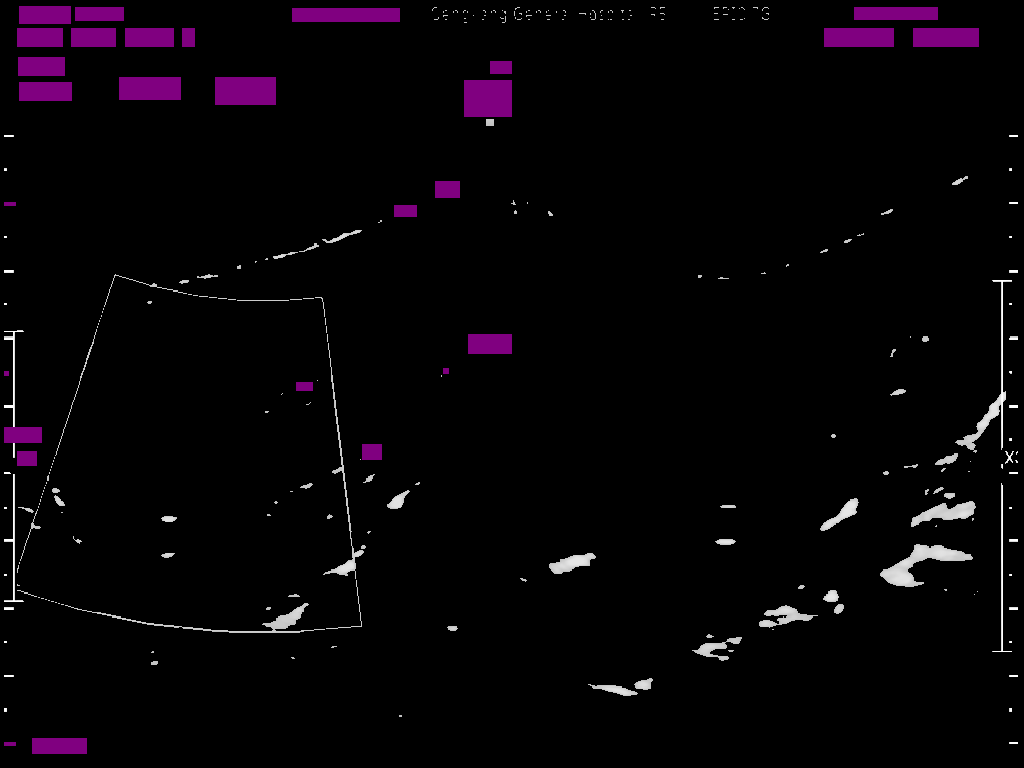

In [26]:
dicom_bw2

4: (19,6)-(22,69)	"Mickey"
5: (75,7)-(19,122)	"Mouse"
6: (292,8)-(20,398)	"12345678654"
8: (17,28)-(45,61)	"Abd"
9: (71,28)-(45,114)	"Gen"
10: (125,28)-(45,172)	"SKH"
11: (182,28)-(45,193)	"2"
13: (18,57)-(74,63)	"C5-4"
14: (490,61)-(72,510)	"Ma"
16: (19,82)-(99,70)	"17Hz"
17: (119,77)-(98,179)	"Left"
18: (215,77)-(103,274)	"Long"
19: (464,80)-(115,510)	"+188"
21: (435,181)-(196,458)	"2"
23: (4,202)-(204,14)	"7"
24: (394,205)-(215,415)	"a"
32: (468,334)-(352,510)	"185"
34: (4,371)-(374,7)	"."
35: (296,382)-(389,311)	"."
36: (443,368)-(372,447)	","
38: (4,427)-(441,40)	"ai"
40: (17,451)-(464,35)	"Ka"
41: (362,444)-(458,380)	"ae"
45: (4,742)-(744,14)	"—"
46: (32,738)-(752,85)	"9.0cm"
54: (854,7)-(18,936)	"21-08-2020"
58: (824,28)-(45,892)	"TISO.6"
59: (913,28)-(45,977)	"MI1.3"
4: (18,6)-(22,69)	"Mickey"
5: (74,7)-(19,122)	"Mouse"
6: (291,8)-(20,399)	"X12345678654"
7: (432,7)-(24,507)	"Sengkang"
8: (514,7)-(21,572)	"General"
9: (577,7)-(24,673)	"Hospital(R5)"
10: (712,7)-(24,747)	" EPIQ"


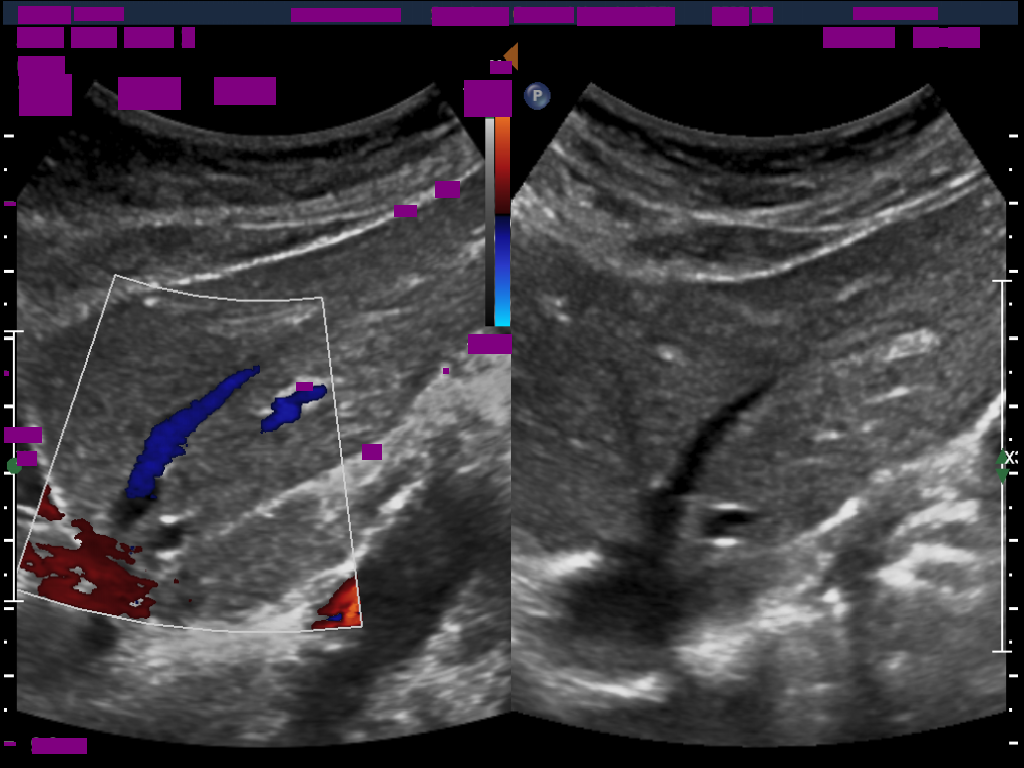

In [27]:
dicom_bw3 = dicom_img.copy()

mark_text(img = dicom_bw3, txt_data = highpass_txt_data)

mark_text(img = dicom_bw3, txt_data = txt_data)

dicom_bw3